In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
import scipy.fft

In [2]:
fX = np.linspace(-np.pi, np.pi, 100)
fY = fX

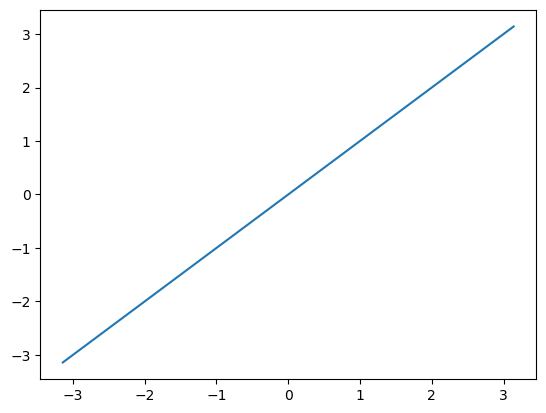

In [3]:
plt.plot(fX, fY)

In [4]:
def fFFT(N):
    n = np.arange(1, N+1)
    return lambda t: np.sum(2/n*(-1)**(n+1)*np.sin(n*t))

In [5]:
func = np.vectorize(fFFT(5))
fFY = func(fX)

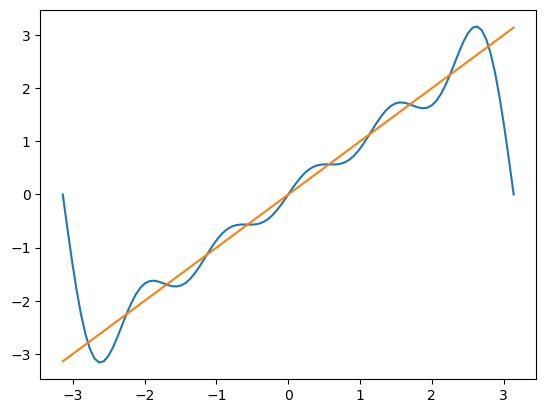

In [6]:
plt.plot(fX, fFY)
plt.plot(fX, fY)

# Transformace

In [7]:
X = np.linspace(-2*np.pi, 2*np.pi, 100)
Y = np.cos(X)
noise = np.random.normal(0, 1, size=X.shape)
Yn = Y + noise 

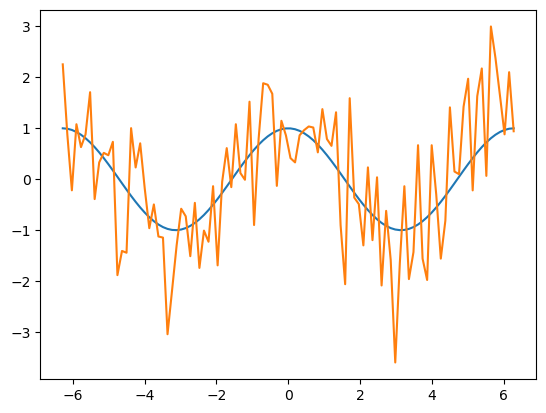

In [8]:
plt.plot(X, Y)
plt.plot(X, Yn)

In [9]:
S = np.fft.fft(Y)
Sn = np.fft.fft(Yn)

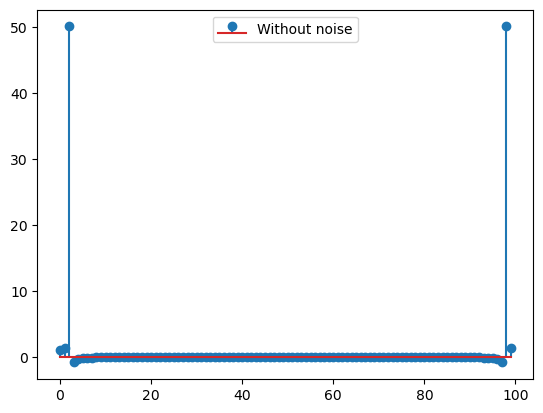

In [10]:
plt.stem( np.real(S), label="Without noise" )
plt.legend()

plt.show()

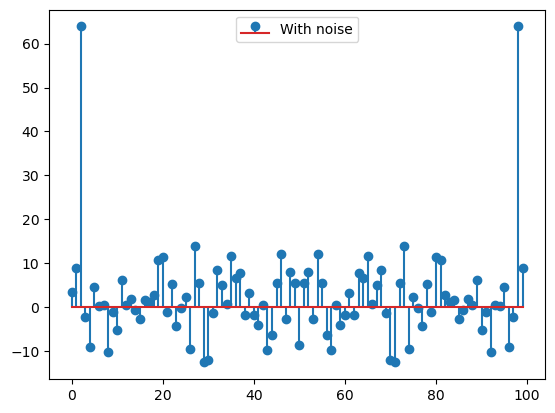

In [11]:
plt.stem( np.real(Sn), label="With noise" )
plt.legend()

plt.show()

In [12]:
Snf = np.copy(Sn)
Snf[np.abs(Sn) < (np.mean(np.abs(Sn)) * 3)] = 0

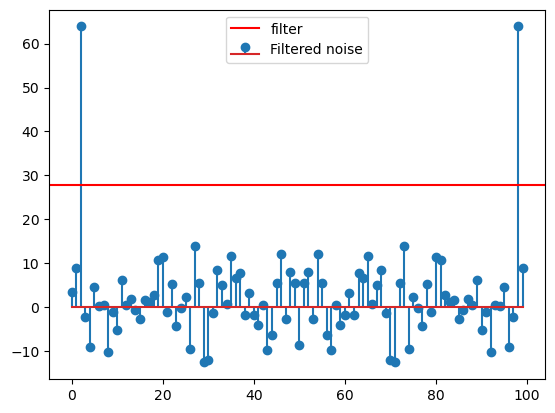

In [13]:
plt.stem( np.real(Sn), label="Filtered noise" )
plt.axhline( (np.mean(np.abs(Sn)) * 3), color="red", label="filter" )
plt.legend()

plt.show()

In [14]:
Sni = np.fft.ifft(Sn)
Snfi = np.fft.ifft(Snf)

Yni = np.real(Sni)
Ynfi = np.real(Snfi)

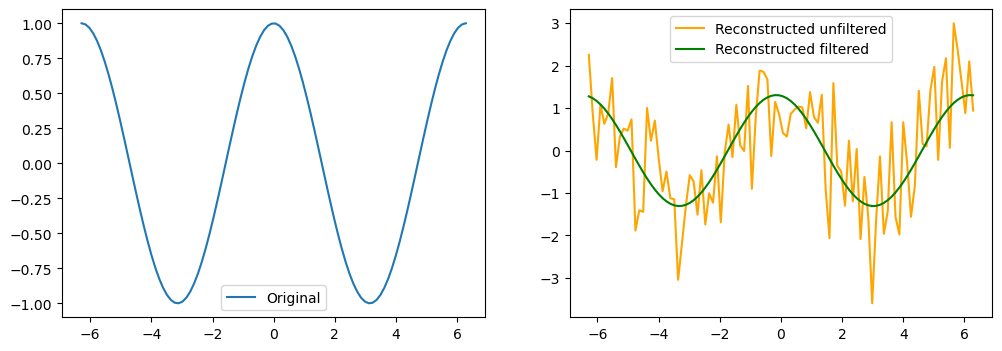

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].plot(X, Y, label="Original")
axs[1].plot(X, Yni, color="orange", label="Reconstructed unfiltered")
axs[1].plot(X, Ynfi, color="green", label="Reconstructed filtered")


axs[0].legend()
axs[1].legend()

plt.show()

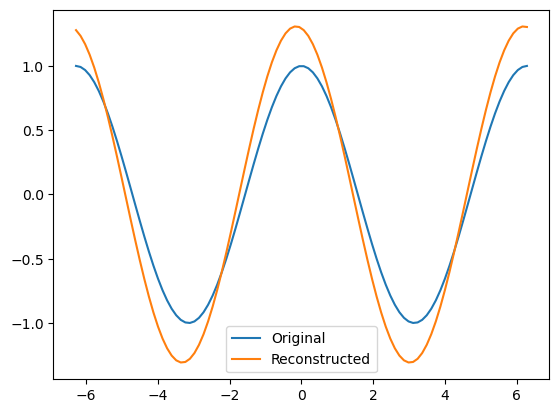

In [16]:
plt.plot(X, Y, label="Original")
plt.plot(X, Ynfi, label="Reconstructed")

plt.legend()

In [17]:
print( "MSE: %s" % np.mean( (Y - Ynfi)**2) )

MSE: 0.061433414918247185
